In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### load csv file

In [5]:
name = ['time (sec)', 'temperature']
df = pd.read_csv('./tmpcsv.csv', header = 0, names = name)
tmp_list = np.asarray(df.values.tolist())
print(tmp_list.shape)

(129, 2)


### counts to celsius: linear regression and polynomial fit

In [26]:
counts_hex = ['0x140', '0x16A', '0x16B', '0x168', '0x16B', '0x16B', '0x16D', '0x16B']
counts_decimal = [ int(a,16) for a in counts_hex]
celsius = [22.5, 26.2, 28.5, 27.5, 28.8, 29, 28.5, 28.7]

In [25]:
slope, intercept, _, _, _ = linregress(counts_decimal, celsius)
print(f'slope={slope}, intercept={intercept}')

slope=0.1345523720785775, intercept=-20.623153971581637


In [30]:
z = np.polyfit(np.asarray(counts_decimal), np.asarray(celsius), 3)
print(f'polynomial={z}')
p = np.poly1d(z)

polynomial=[-7.66069466e-04  8.05540219e-01 -2.81672337e+02  3.27728939e+04]


### plot temperature vs time

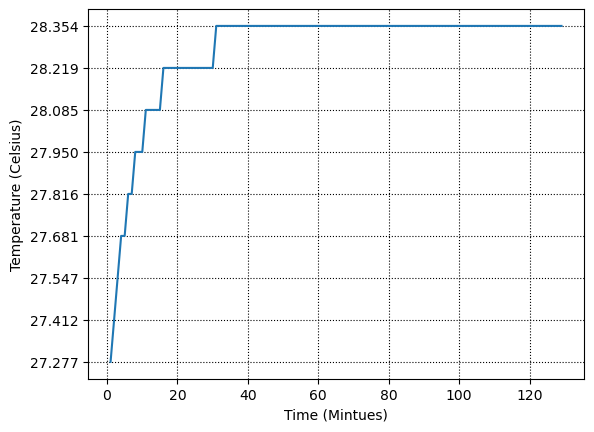

In [24]:
plt.plot(tmp_list[:,0]/60, slope*tmp_list[:,1]+intercept)
yticks = list(set(slope*tmp_list[:,1]+intercept)) # using set() to remove duplicated from list
plt.yticks(yticks)
plt.xlabel('Time (Mintues)')
plt.ylabel('Temperature (Celsius)')
plt.grid(True, color='k', linestyle=':')
plt.show()

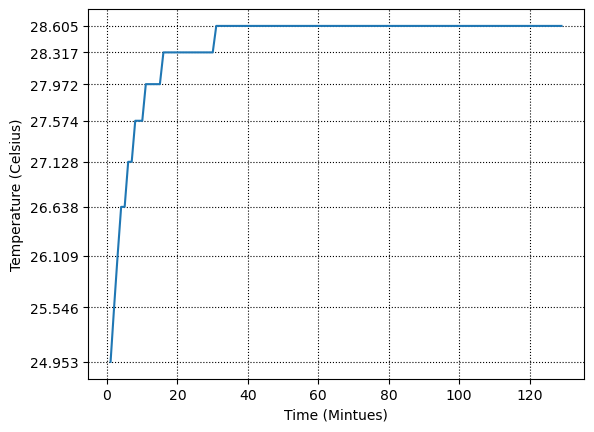

In [29]:
plt.plot(tmp_list[:,0]/60, p(tmp_list[:,1]))
yticks = list(set(p(tmp_list[:,1]))) # using set() to remove duplicated from list
plt.yticks(yticks)
plt.xlabel('Time (Mintues)')
plt.ylabel('Temperature (Celsius)')
plt.grid(True, color='k', linestyle=':')
plt.show()

# Hext to Celcius

In [10]:
z = [-7.66069466e-04,  8.05540219e-01, -2.81672337e+02,  3.27728939e+04]
p = np.poly1d(z)

tmp_count = int('0x16B', 16)

tmp_c = p(tmp_count)
print(tmp_count)
print(tmp_c)

363
28.317376487495494
